In [ ]:
!pip install scikit-learn

<ipython-input-4-28d99be4f817>:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


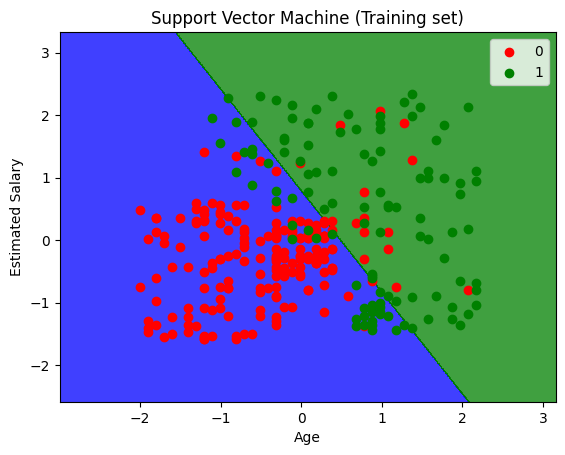

<ipython-input-4-28d99be4f817>:76: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


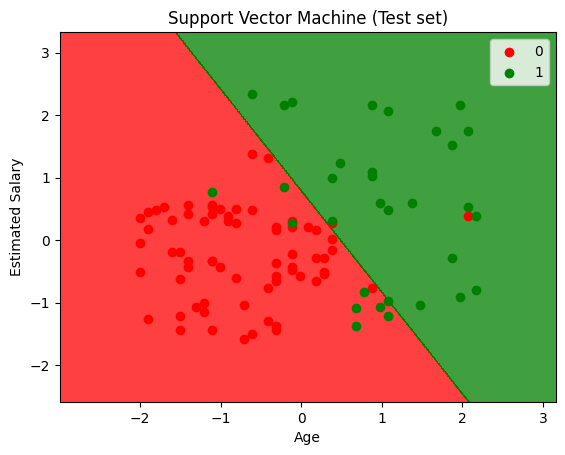

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

datasets = pd.read_csv('Social_Network_Ads (3).csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C=2)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Visualising the Training set results

# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

# Fixing the color problem: 'blue' and 'green' changed to 'b' and 'g'
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['b', 'g']))  # Valid color values

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(['r', 'g'])(i), label = j)  # Valid color values
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

# Fixing the color problem: 'red' and 'green' changed to 'r' and 'g'
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['r', 'g']))  # Valid color values

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(['r', 'g'])(i), label = j)  # Valid color values
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


[[3 0]
 [1 4]]
model accuracy is: 87.5 %


<ipython-input-26-78288293be84>:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(['red', 'orange'])(i), label=j)


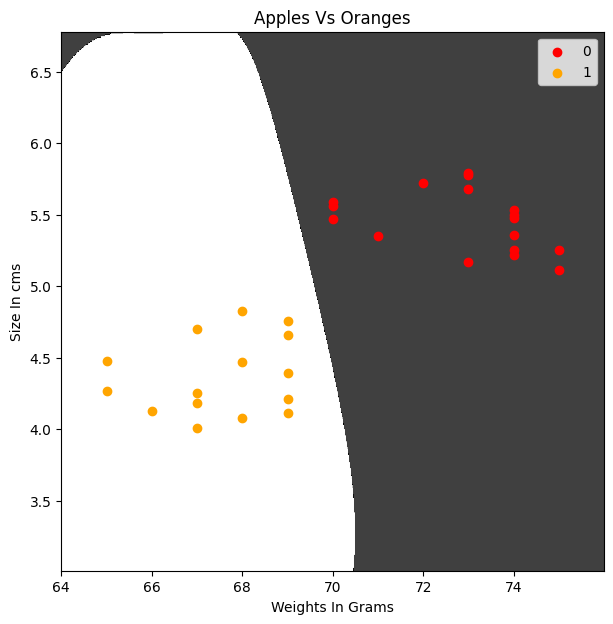

<ipython-input-26-78288293be84>:97: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(['red', 'orange'])(i), label=j)


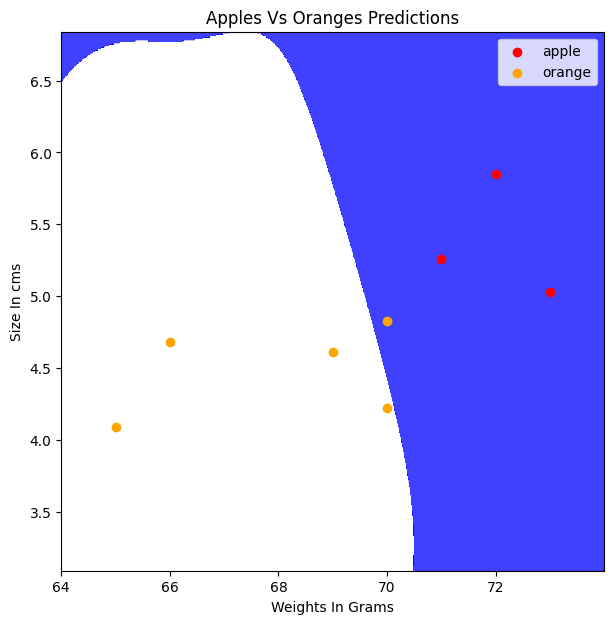

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# read data from csv file
data = pd.read_csv('apples_and_oranges.csv')
#print(data)

# splitting data into training and test set
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)
#print("train:",training_set)
#print("test:",test_set)

# prepare data for applying it to svm
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target
#print(x_train,y_train)
#print(x_test,y_test)

# fitting the data (train a model)
classifier = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')
classifier.fit(x_train,y_train)

# perform prediction on x_test data
y_pred = classifier.predict(x_test)
#test_set['prediction']=y_pred
#print(y_pred)

# creating confusion matrix and accuracy calculation
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = float(cm.diagonal().sum())/len(y_test)
print('model accuracy is:',accuracy*100,'%')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


data = pd.read_csv('apples_and_oranges.csv')
#print(data)
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)
#print("train:",training_set)
#print("test:",test_set)
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target

# using labelencoder to convert string target value into no.
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#print(y_train)

classifier = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')
classifier.fit(x_train,y_train)

# Visualizing the training data after model fitting
plt.figure(figsize=(7,7))
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(['k', 'w']))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    # Corrected color names
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(['red', 'orange'])(i), label=j)

plt.title('Apples Vs Oranges')
plt.xlabel('Weights In Grams')
plt.ylabel('Size In cms')
plt.legend()
plt.show()

# Visualizing the predictions
plt.figure(figsize=(7,7))
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(['b', 'w']))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    # Corrected color names
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(['red', 'orange'])(i), label=j)

plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weights In Grams')
plt.ylabel('Size In cms')
plt.legend()
plt.show()


<ipython-input-11-8a6eef6afa91>:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k", label="Decision Boundary")
<ipython-input-11-8a6eef6afa91>:34: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=2, colors="k", linestyles="--", label="Margins")


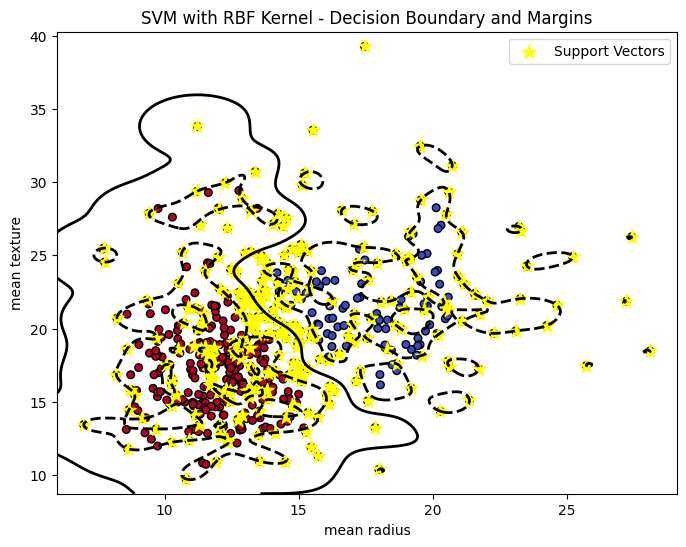

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Use only the first two features for 2D visualization
y = cancer.target

# Build and train the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X, y)

# Define the plot limits for the decision boundary grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a grid of points to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict class probabilities for each point in the grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins (decision function contours)
plt.figure(figsize=(8, 6))

# Plot the decision boundary (where decision function = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k", label="Decision Boundary")

# Plot the margins (where decision function = ±1)
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=2, colors="k", linestyles="--", label="Margins")

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k", marker="o", cmap=plt.cm.coolwarm)

# Mark the support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color="yellow", s=100, marker="*", label="Support Vectors")

# Add title and legend
plt.title("SVM with RBF Kernel - Decision Boundary and Margins")
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()

plt.show()


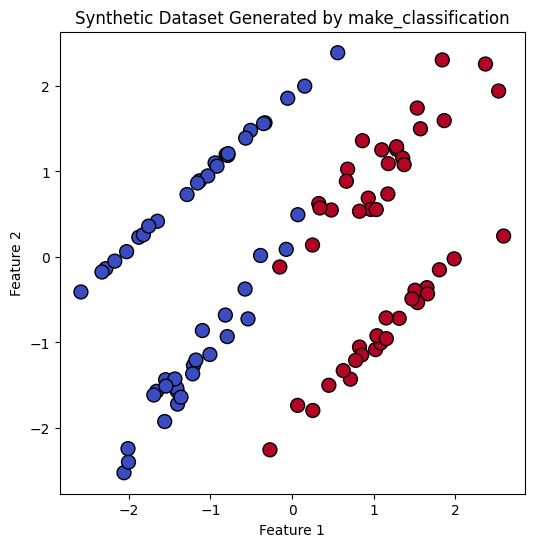

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



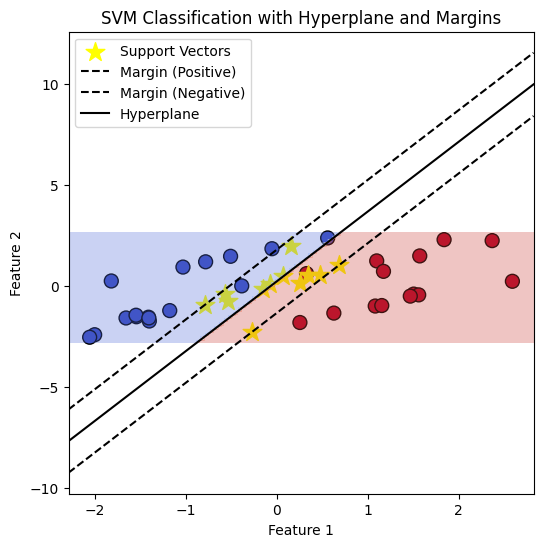

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train the Support Vector Machine (SVM) model
model = SVC(kernel='linear')  # Using linear kernel
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Step 2: Plot the dataset
plt.figure(figsize=(6, 6))

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)

# Add labels and title
plt.title("Synthetic Dataset Generated by make_classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot decision boundary and margins
plt.figure(figsize=(6,6))

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', edgecolors='k', s=100)

# Get the support vectors
support_vectors = model.support_vectors_

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', s=200, marker='*', label='Support Vectors')

# Plot the decision boundary
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the margin lines (distance from hyperplane)
# We will use the coefficients of the model to plot the margins
coef = model.coef_[0]
intercept = model.intercept_[0]

# Equation of the decision boundary: w*x + b = 0
# For margin lines, we use w*x + b = +/- 1
xx_line = np.linspace(x_min, x_max, 100)
yy_line_pos = (-coef[0] * xx_line - intercept + 1) / coef[1]  # Positive margin
yy_line_neg = (-coef[0] * xx_line - intercept - 1) / coef[1]  # Negative margin

# Plot the margin lines
plt.plot(xx_line, yy_line_pos, 'k--', label='Margin (Positive)')
plt.plot(xx_line, yy_line_neg, 'k--', label='Margin (Negative)')

# Plot the hyperplane (decision boundary)
yy_line_hyperplane = (-coef[0] * xx_line - intercept) / coef[1]  # Decision boundary
plt.plot(xx_line, yy_line_hyperplane, 'k-', label='Hyperplane')

# Add labels and title
plt.title("SVM Classification with Hyperplane and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
